In [1]:
from math import pi
import matplotlib.pyplot as plt
# from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now
import numpy as np
import time

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 37
np.random.seed(seed)
print(seed)

37


In [3]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[i for i in range(num_qubits)])

    qml.RY(wires=0,phi=theta[0])
    qml.RZ(wires=0,phi=theta[1])
    qml.RY(wires=0,phi=theta[2])
    # qml.RZ(wires=0,phi=theta[3])

    # qml.RY(wires=1,phi=theta[1])
    # qml.CNOT(wires=[0,1])
    # return qml.probs(wires=[0,1])
    # return qml.probs(wires=[0])
    return qml.expval(qml.PauliZ(wires=0))

In [4]:
def encoder(x):
    # vector_x = [x,x**2,x**3,x**4]
    vector_x = [1,x]
    # vector_x = [x+x**2,1+x**3]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [5]:

def f(theta,w,x):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    # return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    return (f_val*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [6]:
#Initial Values
# del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
# del1_val0, w1_val0, del2_val0, w2_val0, del3_val0, w3_val0, 
P_e1_val, P_e2, P_e3 = [0.6752906135934531, 1.6600252038151728, 0.8567743193454452]
del1_val0 = 0.2804973072795233
w1_val0 = 1.0000044703254576
del2_val0 = 0.6010975528223498
w2_val0 = 0.9999876797884788
del3_val0 = 0.4816056008516666
w3_val0 = 0.9999868311162106

In [7]:
# Differential equation parameters

# Ws, H1, H2, H3, D1, D2, D3
Ws, H1, H2, H3, D1, D2, D3 = (376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01)

# P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3
P_m1, P_m2, P_m3, X_d_p1, X_d_p2, X_d_p3 = (0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813)

# e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3
e_q_p1, e_q_p2, e_q_p3, R_a1, R_a2, R_a3 = (1.0566, 1.0502, 1.0170, 0, 0, 0)

# a11-a26 of Y
a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26 = (0.657, 3.816, 0, 0, 0.070, -0.631, -3.816, 0.657, 0, 0, 0.631, 0.070)

# a31-a46 of Y
a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42, a_43, a_44, a_45, a_46 = (0, 0, 0, 5.486, 0, 0, 0, 0, -5.486, 0, 0, 0)

# a51-a56 of Y
a_51, a_52, a_53, a_54, a_55, a_56 = (0.070, -0.631, 0, 0, 0.174, 2.796)

# a61-a66 of Y
a_61, a_62, a_63, a_64, a_65, a_66 = (0.631, 0.070, 0, 0, -2.796, 0.174)

In [8]:
cos = np.cos
sin = np.sin

In [9]:
def f1(del1,del2,del3):
   return (-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))

def f2(del1,del2,del3):
   return (-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))

def f3(del1,del2,del3):
    return (-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))

In [10]:
def DE1(delta1,delta2,delta3,delta1_prime,delta1_double_prime):
    right_hand = (Ws/2*H1)*(P_m1-f1(delta1,delta2,delta3)-D1*delta1_prime)
    return delta1_double_prime - right_hand

def DE2(delta1,delta2,delta3,delta2_prime,delta2_double_prime):
    right_hand = (Ws/2*H2)*(P_m2-f2(delta1,delta2,delta3)-D2*delta2_prime)
    return delta2_double_prime - right_hand

def DE3(delta1,delta2,delta3,delta3_prime,delta3_double_prime):
    right_hand = (Ws/2*H3)*(P_m3-f3(delta1,delta2,delta3)-D3*delta3_prime)
    return delta3_double_prime - right_hand

In [11]:
n_grid = 20
range_min = 10
range_max = 10.083
t_data = np.linspace(range_min, range_max, n_grid)
dt = t_data[1]-t_data[0]

In [12]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    global w
    global theta
 
    # Reshape the flattened theta back to its original shape
    w = np.reshape(params[:w.size], w.shape)
    theta = np.reshape(params[w.size:], theta.shape)
    w1 = w[0]
    w2= w[1]
    w3 = w[2]
    theta1 = theta[0]
    theta2 = theta[1]
    theta3 = theta[2]


    u1 = np.zeros(n_grid + 2)
    u2 = np.zeros(n_grid + 2)
    u3 = np.zeros(n_grid + 2)
    
    u1[0] = f(theta1,w1, range_min - dt)
    u1[1] = del1_val0

    u2[0] = f(theta2,w2, range_min - dt)
    u2[1] = del2_val0

    u3[0] = f(theta3,w3, range_min - dt)
    u3[1] = del3_val0

    for i in range(1, n_grid):
        u1[i + 1] = f(theta1,w1, t_data[i])
        u2[i + 1] = f(theta2,w2, t_data[i])
        u3[i + 1] = f(theta3,w3, t_data[i])


    u1[n_grid + 1]=f(theta1,w1, range_max + dt)  
    u2[n_grid + 1]=f(theta2,w2, range_max + dt)  
    u3[n_grid + 1]=f(theta3,w3, range_max + dt)  
    
    u1_prime = (u1[2:] - u1[:-2])/(2*dt)
    omega1_0 = (1/Ws)*u1_prime[0]+1
    u1_double_prime = (u1_prime[2:] - u1_prime[:-2])/(2*dt)

    u2_prime = (u2[2:] - u2[:-2])/(2*dt)
    omega2_0 = (1/Ws)*u2_prime[0]+1
    u2_double_prime = (u2_prime[2:] - u2_prime[:-2])/(2*dt)

    u3_prime = (u3[2:] - u3[:-2])/(2*dt)
    omega3_0 = (1/Ws)*u3_prime[0]+1
    u3_double_prime = (u3_prime[2:] - u3_prime[:-2])/(2*dt)


    # u_prime = f_prime(a, b, c, d,t_data)
    # u_double_prime = f_double_prime(a, b, c, d,t_data)

    loss_i_DE1 = np.sum((DE1(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta1_prime=u1_prime[1:-1],delta1_double_prime=u1_double_prime)**2))
    loss_i_DE2 = np.sum((DE2(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta2_prime=u2_prime[1:-1],delta2_double_prime=u2_double_prime)**2))
    loss_i_DE3 = np.sum((DE3(delta1=u1[2:-2],delta2=u2[2:-2],delta3=u3[2:-2],delta3_prime=u3_prime[1:-1],delta3_double_prime=u3_double_prime)**2))



    loss_i = loss_i_DE1 + loss_i_DE2 + loss_i_DE3
    # loss_i = np.sum((DE(f=u[2:-2],f_prime=u_prime[1:-1],f_double_prime=u_double_prime,t=t_data[1:-1]))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    # del0_pred = f(a, b, c, d, 0)
    # omega0_pred = f_prime(a, b, c, d, 0) + ws
    # loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)

    loss_b = 0
    loss_b += eta * (omega1_0 - w1_val0) ** 2 * len(t_data)
    loss_b += eta * (omega2_0 - w2_val0) ** 2 * len(t_data)
    loss_b += eta * (omega3_0 - w3_val0) ** 2 * len(t_data)
    # loss_b += eta * (omega_0_v - omega_0) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = (loss_i+loss_b) / len(t_data)
    # loss = loss_i
    # print("Current loss:", loss) 

    return loss/10000


In [13]:
import numpy as np
from scipy.optimize import minimize
import random

# Initialize w and theta with random values
np.random.seed(20)  # Set a seed for reproducibility
# w = np.random.rand(3, 3)*0
# theta = np.random.rand(3, 4, 2)

w = np.array([np.zeros(3),np.zeros(3),np.zeros(3)])
theta = np.random.uniform(0, 2 * np.pi, size=(3,3))


# Create initial_params as a list
initial_params = [w, theta]

# Flatten initial_params into a 1D array
initial_params_flat = np.concatenate([initial_params[0].flatten(), initial_params[1].flatten()])
start_time = time.time()

# Call minimize with the wrapper function
result = minimize(loss, initial_params_flat, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

end_time = time.time()
runtime = end_time - start_time
print(f"Runtime: {runtime} seconds")

# Extract the optimized values of w and theta from the result
optimized_params_flat = result.x
w = np.reshape(optimized_params_flat[:w.size], w.shape)
theta = np.reshape(optimized_params_flat[w.size:], theta.shape)


# SAVE PARAMETERS
# Generate a random string for the file name
random_string = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789', k=8))

# Get the current time as a timestamp
timestamp = int(time.time())

# Combine the timestamp and random string to create the file name
file_name = f"{range_min}-{range_max}_data_{timestamp}_{random_string}.npz"

# Save the data to a file using np.savez
np.savez(file_name, w=w, theta=theta)

print(f"Data saved to file: {file_name}")

Current loss: 1453760.9527696525
Current loss: 48794.544147637585
Current loss: 2938.802537628842
Current loss: 2904.9955410324915
Current loss: 1702.9273903475537
Current loss: 1685.518068859792


In [ ]:
del1_target_values=[0.2804973072795233, 0.2805051830226228, 0.2805132876769802, 0.28052152499013744, 0.2805298607697809, 0.2805382834328676, 0.28054678945609185, 0.2805553778911808, 0.280564048587638, 0.28057280154696873, 0.280581636782178, 0.2805905542741075, 0.2805995539667384, 0.28060863579163126, 0.2806177996707924, 0.2806270455167802, 0.28063637323921103, 0.28064578274747354, 0.2806552739499121, 0.2806648467545078]
omega1_target_values=[1.0000046737616586, 1.0000048667724495, 1.0000049669779199, 1.0000050336071997, 1.0000050886035976, 1.000005139870755, 1.00000519006299, 1.0000052400275043, 1.000005289972429, 1.0000053399321678, 1.000005389889065, 1.0000054398212996, 1.0000054897166084, 1.0000055395661418, 1.0000055893642863, 1.0000056391086325, 1.0000056887981608, 1.0000057384322039, 1.0000057880104263, 1.0000058375326975]
del2_target_values=[0.6010975528223498, 0.60143836886673, 0.6022122070548296, 0.603176079912551, 0.6042234434484818, 0.6053073452339547, 0.6064073752449287, 0.6075144226286759, 0.6086245943868577, 0.6097361189284795, 0.6108482298815475, 0.6119606002607958, 0.6130730958608201, 0.6141856439786457, 0.6152982062026754, 0.6164107779536281, 0.6175233573663085, 0.6186359383916308, 0.6197485201064558, 0.620861102090323]
omega2_target_values=[0.999987822900838, 1.0003737059970692, 1.0005430780214404, 1.000617432711001, 1.0006500420614564, 1.0006643822871408, 1.000670658400075, 1.000673425826622, 1.0006746310659524, 1.0006751599135633, 1.00067539555545, 1.000675501484247, 1.0006755448026559, 1.0006755618621639, 1.0006755718685703, 1.0006755771115148, 1.0006755785235957, 1.0006755791293553, 1.0006755793903641, 1.0006755795168523]
del3_target_values=[0.4816056008516666, 0.48181083408192327, 0.482276085143536, 0.4828552050967025, 0.48348405114994225, 0.4841343303734485, 0.48479373265491055, 0.4854567582352516, 0.48612105525170407, 0.48678555296545567, 0.4874497881465937, 0.4881135633897069, 0.4887767980888316, 0.4894394489054983, 0.49010149330009745, 0.4907629292536171, 0.4914237564092188, 0.4920839718816084, 0.49274357589174145, 0.49340256896722073]
omega3_target_values=[0.9999929868959316, 1.000224781456549, 1.000326404594554, 1.0003708474656123, 1.000390145122699, 1.000398428222867, 1.0004018451696832, 1.0004031430899303, 1.0004034969649758, 1.0004034419474714, 1.0004032097827746, 1.0004028994558163, 1.0004025516182231, 1.000402188308696, 1.0004018211778964, 1.0004014516274193, 1.0004010802282481, 1.0004007088136657, 1.000400337665102, 1.000399966910345]

In [ ]:
w1 = w[0]
w2= w[1]
w3 = w[2]
theta1 = theta[0]
theta2 = theta[1]
theta3 = theta[2]

20
20
0.2806648467545078


Text(0.5, 1.0, 'Fitting Data')

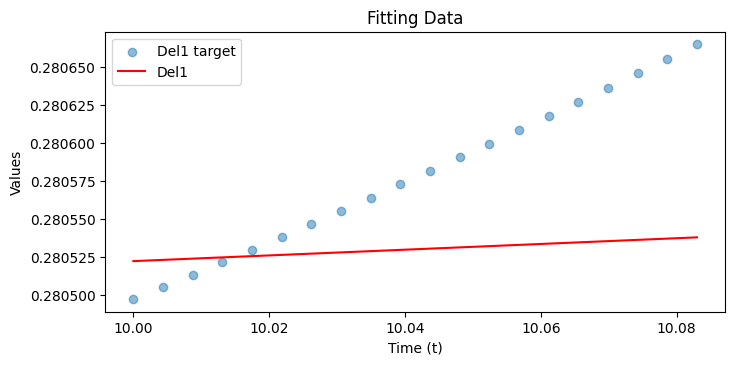

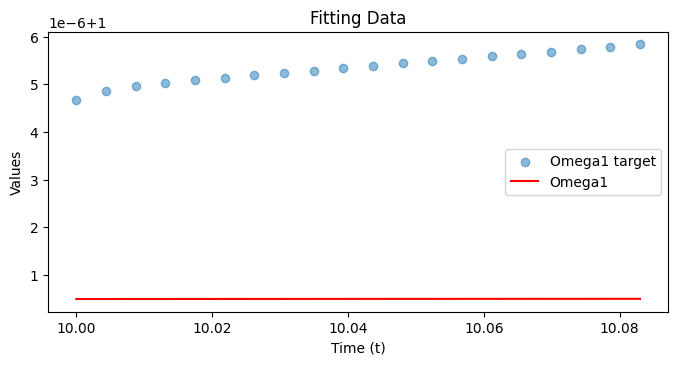

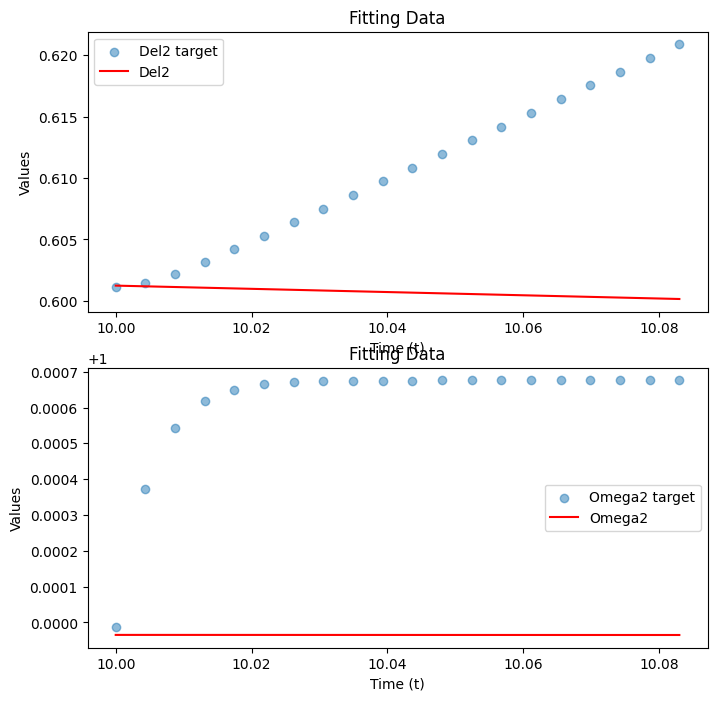

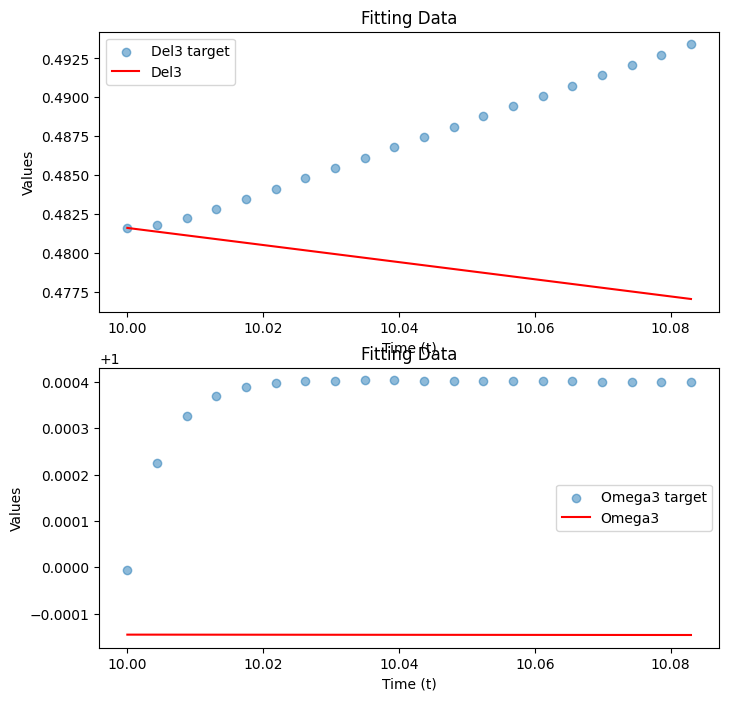

In [ ]:
import matplotlib.pyplot as plt

# t2_data = [t_data[i] for i in range(0,len(t_data),2) ]
# del1_target_values_2 =  [del1_target_values[i] for i in range(0,len(del1_target_values),2) ]
# print(len(t2_data))
# print(len(del1_target_values_2))


print(len(t_data))
print(len(del1_target_values))



# delta1_omega1
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del1_target_values, label='Del1 target', alpha=0.5)
delta_pred1 = [f(theta1,w1,ti) for ti in t_data]
plt.plot(t_data, delta_pred1, 'r', label='Del1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

print(del1_target_values[-1])


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.scatter(t_data, omega1_target_values, label='Omega1 target', alpha=0.5)
delta_pred1_prime = np.gradient(delta_pred1, t_data)
omega_pred1 = (1/Ws)*delta_pred1_prime+1
plt.plot(t_data, omega_pred1, 'r', label='Omega1')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta2_omega2
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del2_target_values, label='Del2 target', alpha=0.5)
delta_pred2 = [f(theta2,w2,ti) for ti in t_data]
plt.plot(t_data, delta_pred2, 'r', label='Del2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega2_target_values, label='Omega2 target', alpha=0.5)
delta_pred2_prime = np.gradient(delta_pred2, t_data)
omega_pred2 = (1/Ws)*delta_pred2_prime+1
plt.plot(t_data, omega_pred2, 'r', label='Omega2')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')



# delta3_omega3
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.scatter(t_data, del3_target_values, label='Del3 target', alpha=0.5)
delta_pred3 = [f(theta3,w3,ti) for ti in t_data]
plt.plot(t_data, delta_pred3, 'r', label='Del3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')

plt.subplot(2, 1, 2)
plt.scatter(t_data, omega3_target_values, label='Omega3 target', alpha=0.5)
delta_pred3_prime = np.gradient(delta_pred3, t_data)
omega_pred3 = (1/Ws)*delta_pred3_prime+1
plt.plot(t_data, omega_pred3, 'r', label='Omega3')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')




In [ ]:
print(delta_pred3)
print(del3_target_values)

[tensor(0.4816066, requires_grad=True), tensor(0.48136677, requires_grad=True), tensor(0.48112687, requires_grad=True), tensor(0.4808869, requires_grad=True), tensor(0.48064685, requires_grad=True), tensor(0.48040674, requires_grad=True), tensor(0.48016655, requires_grad=True), tensor(0.4799263, requires_grad=True), tensor(0.47968597, requires_grad=True), tensor(0.47944557, requires_grad=True), tensor(0.4792051, requires_grad=True), tensor(0.47896456, requires_grad=True), tensor(0.47872395, requires_grad=True), tensor(0.47848326, requires_grad=True), tensor(0.47824251, requires_grad=True), tensor(0.47800168, requires_grad=True), tensor(0.47776078, requires_grad=True), tensor(0.47751982, requires_grad=True), tensor(0.47727878, requires_grad=True), tensor(0.47703767, requires_grad=True)]
[0.4816056008516666, 0.48181083408192327, 0.482276085143536, 0.4828552050967025, 0.48348405114994225, 0.4841343303734485, 0.48479373265491055, 0.4854567582352516, 0.48612105525170407, 0.48678555296545567

In [ ]:
print('del1=',del1_target_values[-1])
print('omega1=',omega_pred1[-1])
print('delt2=',del2_target_values[-1])
print('omega2=',omega_pred2[-1])
print('del3=',del3_target_values[-1])
print('omega3=',omega_pred3[-1])


del1= 0.2806648467545078
omega1= 1.0000005018945872
delt2= 0.620861102090323
omega2= 0.9999650882499528
del3= 0.49340256896722073
omega3= 0.9998535934432776


In [ ]:
print('del1=',[float(delta_pred1[i]) for i in range(len(delta_pred1))])
print('del2=',[float(delta_pred2[i]) for i in range(len(delta_pred2))])
print('del3=',[float(delta_pred3[i]) for i in range(len(delta_pred3))])
print('omega1=',[float(omega_pred1[i]) for i in range(len(omega_pred1))])
print('omega2=',[float(omega_pred2[i]) for i in range(len(omega_pred2))])
print('omega3=',[float(omega_pred3[i]) for i in range(len(omega_pred3))])


del1= [0.280522235637641, 0.28052305552992757, 0.28052387579197824, 0.2805246964237931, 0.280525517425372, 0.2805263387967151, 0.2805271605378224, 0.2805279826486937, 0.2805288051293292, 0.28052962797972886, 0.2805304511998926, 0.28053127478982054, 0.2805320987495125, 0.2805329230789687, 0.280533747778189, 0.2805345728471734, 0.280535398285922, 0.2805362240944347, 0.28053705027271153, 0.2805378768207525]
del2= [0.6012447382709212, 0.6011876796258182, 0.6011305967598836, 0.6010734896731171, 0.6010163583655188, 0.6009592028370889, 0.600902023087827, 0.6008448191177336, 0.6007875909268083, 0.6007303385150513, 0.6006730618824625, 0.6006157610290419, 0.6005584359547895, 0.6005010866597055, 0.6004437131437896, 0.600386315407042, 0.6003288934494627, 0.6002714472710515, 0.6002139768718087, 0.600156482251734]
del3= [0.48160660059228366, 0.4813667705700346, 0.48112686941037863, 0.48088689711331556, 0.48064685367884563, 0.48040673910696924, 0.4801665533976859, 0.4799262965509956, 0.47968596856689